# Retail Transaction Product Category Classification

### Imports

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [90]:
data = pd.read_csv('retail_data.csv')

In [91]:
print (data.head())
print (data.columns)

   Transaction_ID  Customer_ID                 Name                Email  \
0       8691788.0      37249.0  Michelle Harrington    Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill     Mark36@gmail.com   
2       6679610.0      30192.0         Scott Jensen    Shane85@gmail.com   
3       7232460.0      62101.0        Joseph Miller     Mary34@gmail.com   
4       4983775.0      27901.0        Debra Coleman  Charles30@gmail.com   

          Phone                      Address        City            State  \
0  1.414787e+09            3959 Amanda Burgs    Dortmund           Berlin   
1  6.852900e+09           82072 Dawn Centers  Nottingham          England   
2  8.362160e+09            4133 Young Canyon     Geelong  New South Wales   
3  2.776752e+09  8148 Thomas Creek Suite 100    Edmonton          Ontario   
4  9.098268e+09    5813 Lori Ports Suite 269     Bristol          England   

   Zipcode    Country  ...  Total_Amount Product_Category  Product_Brand  \
0  7

## Data Cleaning

Remove unnecessary columns with specific user_transaction information such as Name, Email, Phone, etc. Similarly, remove the redundant columns: Year and Month as they are already represented in 'Date'.

In [92]:
data = data.drop(columns=['City', 'State', 'Zipcode', 'Country', 'Transaction_ID', 'Customer_ID', 'Address', 'Name', 'Email', 'Phone', 'Order_Status', 'Payment_Method', 'products', 'Year', 'Month', 'Time'])

### Data Exploration

In [93]:
unique_counts = data.nunique()

print("Number of unique values per attribute")
print(unique_counts)

Number of unique values per attribute
Age                     53
Gender                   2
Income                   3
Customer_Segment         3
Date                   366
Total_Purchases         10
Amount              299297
Total_Amount        299305
Product_Category         5
Product_Brand           18
Product_Type            33
Feedback                 4
Shipping_Method          3
Ratings                  5
dtype: int64


In [94]:
for column in data.columns:
    unique_values = data[column].unique()
    
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("-" * 50)

Unique values in 'Age':
[21. 19. 48. 56. 22. 58. 29. 46. 25. 64. 31. 53. 32. 43. 69. 49. 61. 41.
 38. 59. 20. 67. 50. 26. 66. 24. 54. 28. 34. 65. 40. 68. 36. 57. 27. 35.
 70. 37. 30. 39. 47. 18. 60. 33. 62. 42. 44. 51. 63. 55. 23. 52. nan 45.]
--------------------------------------------------
Unique values in 'Gender':
['Male' 'Female' nan]
--------------------------------------------------
Unique values in 'Income':
['Low' 'High' 'Medium' nan]
--------------------------------------------------
Unique values in 'Customer_Segment':
['Regular' 'Premium' 'New' nan]
--------------------------------------------------
Unique values in 'Date':
['9/18/2023' '12/31/2023' '4/26/2023' '05-08-23' '01-10-24' '9/21/2023'
 '6/26/2023' '3/24/2023' '01-06-24' '10-04-23' '7/20/2023' '6/21/2023'
 '01-02-24' '05-07-23' '11/18/2023' '6/15/2023' '07-01-23' '4/14/2023'
 '02-07-24' '10/24/2023' '3/21/2023' '08-06-23' '02-03-24' '5/31/2023'
 '2/27/2024' '4/20/2023' '06-03-23' '01-07-24' '4/22/2023' '02-06-24'

In [95]:
for column in data.columns:
    value_counts = data[column].value_counts(normalize=True) * 100

    print(f"Percentage of unique values in '{column}':")
    print(value_counts)
    print("-" * 50)

Percentage of unique values in 'Age':
Age
20.0    11.488982
46.0    10.190600
26.0     8.173617
22.0     7.627627
34.0     6.842104
23.0     5.974417
19.0     5.581158
21.0     2.668328
24.0     2.050444
55.0     1.812568
48.0     1.526652
70.0     0.905787
43.0     0.892866
59.0     0.890216
36.0     0.888559
68.0     0.884252
33.0     0.883589
64.0     0.876963
44.0     0.875638
56.0     0.872988
30.0     0.870337
65.0     0.870006
60.0     0.868018
62.0     0.867024
47.0     0.864705
40.0     0.863380
41.0     0.859736
25.0     0.859404
50.0     0.859073
35.0     0.857416
52.0     0.857085
28.0     0.856754
58.0     0.855760
39.0     0.855760
69.0     0.855097
38.0     0.854103
42.0     0.854103
57.0     0.853772
61.0     0.853109
63.0     0.852447
37.0     0.852116
27.0     0.851784
49.0     0.851784
67.0     0.845158
51.0     0.844827
45.0     0.844164
53.0     0.843502
29.0     0.841514
32.0     0.838201
54.0     0.833894
18.0     0.821636
66.0     0.819648
31.0     0.817329
Name

In [96]:
rows_with_nans = data[data.isna().any(axis=1)]

print("Rows with NaN values:")
print(rows_with_nans)
print("NUM ROWS", len(rows_with_nans))

print("NUM RECORDS", len(data))

Rows with NaN values:
         Age  Gender  Income Customer_Segment       Date  Total_Purchases  \
109     65.0    Male     Low          Regular  6/24/2023              4.0   
123     39.0    Male  Medium          Regular   03-05-23             10.0   
142     37.0    Male    High          Regular   09-12-23              1.0   
174     50.0    Male    High          Regular  7/23/2023              NaN   
232      NaN  Female     Low          Regular   01-09-24             10.0   
...      ...     ...     ...              ...        ...              ...   
301515  36.0  Female  Medium          Regular  9/23/2023              6.0   
301567  37.0    Male     Low              New  2/27/2024              1.0   
301738  35.0    Male     NaN          Premium   11-07-23              2.0   
301875  44.0    Male    High          Premium   01-09-24              6.0   
301883  31.0    Male     NaN          Regular   06-09-23             10.0   

            Amount  Total_Amount Product_Category  Pr

In [97]:
data = data.dropna()
data.head()
print("Num Remaining", len(data))

Num Remaining 298513


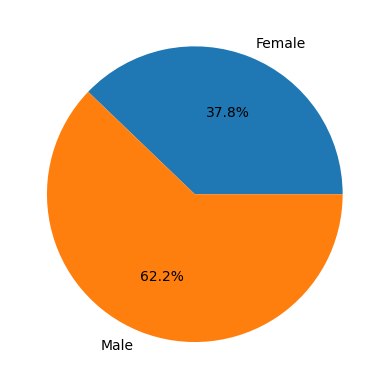

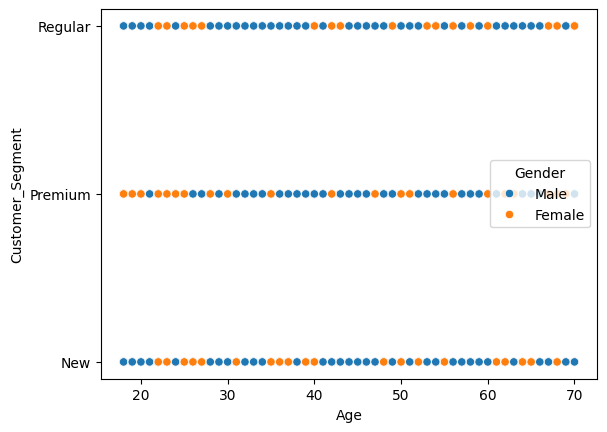

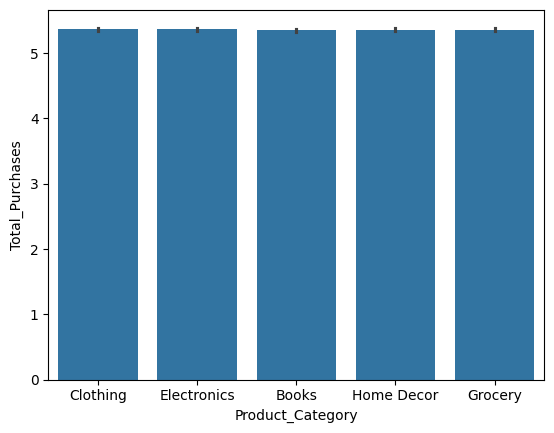

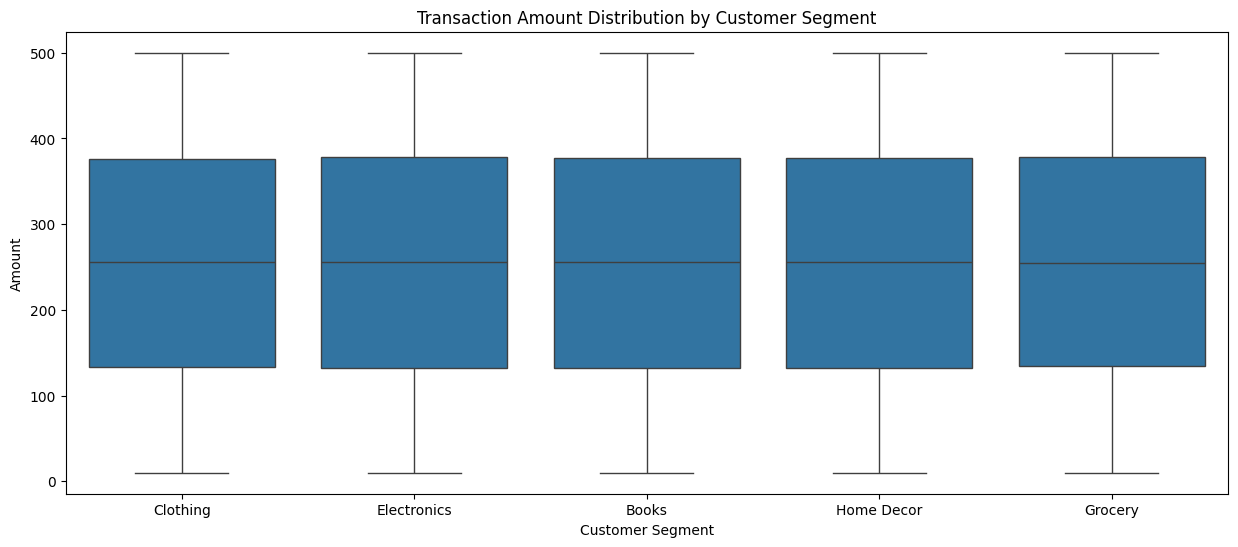

In [98]:
plt.figure(1)
data.groupby('Gender').size().plot.pie(autopct='%1.1f%%')

plt.figure(2)
sns.scatterplot(x='Age', y='Customer_Segment', hue='Gender', data=data)

plt.figure(3)
sns.barplot(x='Product_Category', y='Total_Purchases', data=data)

plt.figure(figsize=(15,6))
sns.boxplot(data=data, x='Product_Category', y='Amount')
plt.title("Transaction Amount Distribution by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Amount")
plt.show()

## Feature Engineering

In [99]:
item_to_category = {
    'Water': 'Drink',
    'Juice': 'Drink',
    'Soft Drink': 'Drink',
    'Coffee': 'Drink',
    'Chocolate': 'Food',
    'Snacks': 'Food',
    'Non-Fiction': 'Media',
    'Fiction': 'Media',
    'Thriller': 'Media',
    'Literature': 'Media',
    'Television': 'Media',
    'Mitsubishi AC': 'HVAC',
    'BlueStar AC': 'HVAC',
    'Fridge': 'Kitchen Equipment',
    'Kitchen': 'Kitchen Equipment',
    'T-Shirt': 'Upper Body Clothing',
    'Shirt': 'Upper Body Clothing',
    'Dress': 'Upper Body Clothing',
    'Jacket': 'Upper Body Clothing',
    'Shoes': 'Lower Body Clothing',
    'Jeans': 'Lower Body Clothing',
    'Shorts': 'Lower Body Clothing',
    'Decorations': 'Home Decor',
    'Furniture': 'Home Decor',
    'Lighting': 'Home Decor',
    'Bathroom': 'Home Decor',
    'Bedding': 'Home Decor',
    'Smartphone': 'Electronics',
    'Tablet': 'Electronics',
    'Headphones': 'Electronics',
    'Laptop': 'Electronics',
    'Children\'s': 'Children\'s',
    'Tools': 'Tools'
}

data['Product_Subcategory'] = data['Product_Type'].map(item_to_category)
last_8_columns = data.iloc[:, -8:]
print(last_8_columns.head())

data = data.drop(columns=['Product_Type'])

   Total_Amount Product_Category  Product_Brand Product_Type   Feedback  \
0    324.086270         Clothing           Nike       Shorts  Excellent   
1    806.707815      Electronics        Samsung       Tablet  Excellent   
2   1063.432799            Books  Penguin Books   Children's    Average   
3   2466.854021       Home Decor     Home Depot        Tools  Excellent   
4    248.553049          Grocery         Nestle    Chocolate        Bad   

  Shipping_Method  Ratings  Product_Subcategory  
0        Same-Day      5.0  Lower Body Clothing  
1        Standard      4.0          Electronics  
2        Same-Day      2.0           Children's  
3        Standard      4.0                Tools  
4        Standard      1.0                 Food  


Transform the 'Date' column into continuous feature value in column 'day_of_year'. Allows for data normalization and standardization of date format. 

In [100]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', format=None)
data['day_of_year'] = data['Date'].dt.dayofyear
data = data.drop(columns=['Date'])

### Data Normalization

In [101]:
data_encoded = pd.get_dummies(data, columns=['Gender', 'Feedback', 'Product_Subcategory', 'Income', 'Product_Category', 'Product_Brand', 'Customer_Segment', 'Shipping_Method'], drop_first=True)
data_encoded.head()

,Age,Total_Purchases,Amount,Total_Amount,Ratings,day_of_year,Gender_Male,Feedback_Bad,Feedback_Excellent,Feedback_Good,...,Product_Brand_Pepsi,Product_Brand_Random House,Product_Brand_Samsung,Product_Brand_Sony,Product_Brand_Whirepool,Product_Brand_Zara,Customer_Segment_Premium,Customer_Segment_Regular,Shipping_Method_Same-Day,Shipping_Method_Standard
0,21.0,3.0,108.028757,324.086270,5.0,261.0,True,False,True,False,...,False,False,False,False,False,False,False,True,True,False
1,19.0,2.0,403.353907,806.707815,4.0,365.0,False,False,True,False,...,False,False,True,False,False,False,True,False,False,True
2,48.0,3.0,354.477600,1063.432799,2.0,116.0,True,False,False,False,...,False,False,False,False,False,False,False,True,True,False
3,56.0,7.0,352.407717,2466.854021,4.0,NaN,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True
4,22.0,2.0,124.276524,248.553049,1.0,NaN,True,True,False,False,...,False,False,False,False,False,False,True,False,False,True


In [102]:
data_normalized = data_encoded.copy()
scaler = StandardScaler()

data_normalized[data_normalized.columns] = scaler.fit_transform(data_normalized[data_normalized.columns])

data_normalized.head()

,Age,Total_Purchases,Amount,Total_Amount,Ratings,day_of_year,Gender_Male,Feedback_Bad,Feedback_Excellent,Feedback_Good,...,Product_Brand_Pepsi,Product_Brand_Random House,Product_Brand_Samsung,Product_Brand_Sony,Product_Brand_Whirepool,Product_Brand_Zara,Customer_Segment_Premium,Customer_Segment_Regular,Shipping_Method_Same-Day,Shipping_Method_Standard
0,-0.963585,-0.822788,-1.040422,-0.924476,1.391299,0.688151,0.779929,-0.409361,1.413194,-0.678433,...,-0.334255,-0.252947,-0.254413,-0.254301,-0.159358,-0.254562,-0.520507,1.031382,1.377072,-0.679012
1,-1.096721,-1.171406,1.048464,-0.496891,0.634196,1.676687,-1.282168,-0.409361,1.413194,-0.678433,...,-0.334255,-0.252947,3.930613,-0.254301,-0.159358,-0.254562,1.921203,-0.969573,-0.726178,1.472728
2,0.833762,-0.822788,0.702753,-0.269442,-0.880009,-0.690096,0.779929,-0.409361,-0.707617,-0.678433,...,-0.334255,-0.252947,-0.254413,-0.254301,-0.159358,-0.254562,-0.520507,1.031382,1.377072,-0.679012
3,1.366309,0.571682,0.688113,0.973937,0.634196,NaN,0.779929,-0.409361,1.413194,-0.678433,...,-0.334255,-0.252947,-0.254413,-0.254301,-0.159358,-0.254562,1.921203,-0.969573,-0.726178,1.472728
4,-0.897016,-1.171406,-0.925499,-0.991396,-1.637112,NaN,0.779929,2.442834,-0.707617,-0.678433,...,-0.334255,-0.252947,-0.254413,-0.254301,-0.159358,-0.254562,1.921203,-0.969573,-0.726178,1.472728


## Decision Trees

In [103]:
training_data, test_data = train_test_split(data_normalized, test_size=0.2, random_state=42)

# Split the training and test data into features and target
X_train = training_data.drop(columns=['Product_Subcategory'])
y_train = training_data['Product_Subcategory']
X_test = test_data.drop(columns=['Product_Subcategory'])
y_test = test_data['Product_Subcategory']

# Create a decision tree classifier
tree = DecisionTreeClassifier(random_state=42)

# Train the model
tree.fit(X_train, y_train)

# Make predictions
train_predictions = tree.predict(X_train)
test_predictions = tree.predict(X_test)

# Calculate the accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Train accuracy: {train_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")

# Make a confusion matrix
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Display the confusion matrix
print("Confusion matrix:")
print(conf_matrix)

KeyError: "['Product_Subcategory'] not found in axis"

## Neural Networks

In [ ]:
# class node:
#     def __init__(self, node_value):
#         self.node_value = node_value
        
# class layer:
#     def __init__(self, activation_function, nodes, edges, input_layer):
#         self.activation_function = activation_function
#         self.nodes = nodes
#         self.edges = edges
#         self.input_layer = input_layer

# def create_network(nodes_per_layer):
#     layers = []

#     # Create Input Layer
#     input_nodes = []
#     for _ in range(nodes_per_layer):
#         input_nodes.append(node())
#     input_layer = layer(None, input_nodes, None, True)
#     layer.append(input_layer)

#     # Create Hidden Layers
#     for _ in range(2):
#         hidden_layer_nodes = []
#         for _ in range(nodes_per_layer):
#             hidden_layer_nodes.append(node())
#         hidden_layer = layer(None, hidden_layer_nodes, None, False)
#         layers.append(hidden_layer)



# # Iterate over all the records
# for index, transaction in data.iterrows():

## SVMs

In [ ]:
# Your Code Here

## K-Nearest Neighbor

In [ ]:
# Your Code Here

## Naive Bayes

In [ ]:
# Your Code Here